# TÌM HIỂU DỮ LIỆU THÔNG QUA HÌNH VẼ VÀ THỬ ICA DỮ LIỆU EEG

#1.Import Và Load thư Viện.

>[1.Import Và Load thư Viện.](#scrollTo=BYara9cRq5gk)

>[A. Data Loader.](#scrollTo=_2RTDYtn-f6B)

>>[1.Mở thử một file .mat](#scrollTo=BI5liuxtCAkg)

>>[2.tạo một class chứa cấu trúc của file .Mat .](#scrollTo=YzYQ7KNe-WPi)

>>[3.Kiểm Tra Dữ Liệu.](#scrollTo=vf29d6_UInv2)

>[B. Sử dụng thư viện Mne để tìm hiểu cấu trúc và filler dữ liệu.](#scrollTo=TRQxOfV7-QEu)

>>[1.Chuyển nó sang định dạng thô.](#scrollTo=XPWGlxKrGlh9)

>>[2.Vẽ đồ thị heatmap để hiện mối quan hệ giữa các biến.](#scrollTo=j0ItOMHnEswJ)

>>[Vẽ biểu đồ đường EEG data.](#scrollTo=Lt7YG1VTFgcC)

>>[4.Vẽ đồ thị phân phối](#scrollTo=5hEwO58fEh1f)

>>[5.Đồ thị power spectral density (PSD)](#scrollTo=bx12U0TEIJXA)

>>[6.Vẽ đồ thị time-series plot.](#scrollTo=_SgOoAPEQsaU)

>>[7.Vẽ đồ thị Frequence Slice tập dữ liệu..](#scrollTo=9FrPWNBHVTfo)

>[C.ICA dữ liệu.](#scrollTo=bjcuB8GdXB7r)

>>[Giải thích về ICA](#scrollTo=HHHsIgi_5fvc)

>>[Mô hình toán học của ICA](#scrollTo=HHHsIgi_5fvc)

>>[Ý nghĩa của ICA](#scrollTo=HHHsIgi_5fvc)

>>>[Khôi phục các thành phần nguyên thủy (Source Separation)](#scrollTo=HHHsIgi_5fvc)

>>>[Phân tích tín hiệu trong nghiên cứu não bộ (EEG, fMRI)](#scrollTo=HHHsIgi_5fvc)

>>>[Phân tích ảnh](#scrollTo=HHHsIgi_5fvc)

>>>[Xử lý tín hiệu và âm thanh](#scrollTo=HHHsIgi_5fvc)

>>>[Ứng dụng trong phân tích dữ liệu lớn (Big Data)](#scrollTo=HHHsIgi_5fvc)

>>>[Tự động học và trí tuệ nhân tạo](#scrollTo=HHHsIgi_5fvc)

>>[Lợi ích và Thách thức của ICA](#scrollTo=HHHsIgi_5fvc)

>>>[Lợi ích](#scrollTo=HHHsIgi_5fvc)

>>>[Thách thức](#scrollTo=HHHsIgi_5fvc)

>>[1.vẽ EOG epoch.](#scrollTo=-GDnmlea9aEb)



Mục tiêu là visualize phân tích sinh động về data để hiểu hơn về Data.

In [43]:
# tải thư viện
from IPython.display import  clear_output
!pip install mne
!pip install tensorflow-addons
clear_output()

In [44]:

import mne
from scipy.io import loadmat
import numpy as np
import pandas as pd
import csv
import pickle
import os
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
import scipy.io
import numpy as np
import pandas as pd
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
import io
import community as community_louvain
import matplotlib.cm as cm
from collections import defaultdict
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from IPython.display import  clear_output
from scipy.io import loadmat
import numpy as np
import pandas as pd
import csv
import pickle
import os
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
import io
import community as community_louvain
import matplotlib.cm as cm
from collections import defaultdict
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
import mne
import matplotlib.pyplot as plt


# A. Data Loader.

In [3]:
# tải dữ liệu về kaggle về.
!kaggle datasets download inancigdem/eeg-data-for-mental-attention-state-detection

# UnZip dữ liệu
!unzip "/content/eeg-data-for-mental-attention-state-detection.zip"
clear_output()

In [4]:
!ls "./EEG Data" # Hiển thị lại một file .mat

eeg_record10.mat  eeg_record17.mat  eeg_record23.mat  eeg_record2.mat	eeg_record4.mat
eeg_record11.mat  eeg_record18.mat  eeg_record24.mat  eeg_record30.mat	eeg_record5.mat
eeg_record12.mat  eeg_record19.mat  eeg_record25.mat  eeg_record31.mat	eeg_record6.mat
eeg_record13.mat  eeg_record1.mat   eeg_record26.mat  eeg_record32.mat	eeg_record7.mat
eeg_record14.mat  eeg_record20.mat  eeg_record27.mat  eeg_record33.mat	eeg_record8.mat
eeg_record15.mat  eeg_record21.mat  eeg_record28.mat  eeg_record34.mat	eeg_record9.mat
eeg_record16.mat  eeg_record22.mat  eeg_record29.mat  eeg_record3.mat


## 1.Mở thử một file .mat

In [5]:
file1 = loadmat('/content/EEG Data/eeg_record1.mat')
print(file1)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Oct 09 21:03:01 2014', '__version__': '1.0', '__globals__': [], 'o': array([[(array(['201410092013.D091BB44'], dtype='<U21'), array([], dtype='<U1'), array([[308868]], dtype=int32), array([[128]], dtype=uint8), array([[0],
               [0],
               [0],
               ...,
               [0],
               [0],
               [0]], dtype=uint8), array([[2.0140e+03, 1.0000e+01, 9.0000e+00, 2.0000e+01, 1.4000e+01,
                1.5360e+00],
               [2.0140e+03, 1.0000e+01, 9.0000e+00, 2.0000e+01, 1.4000e+01,
                1.5360e+00],
               [2.0140e+03, 1.0000e+01, 9.0000e+00, 2.0000e+01, 1.4000e+01,
                1.5360e+00],
               ...,
               [2.0140e+03, 1.0000e+01, 9.0000e+00, 2.0000e+01, 5.4000e+01,
                1.6494e+01],
               [2.0140e+03, 1.0000e+01, 9.0000e+00, 2.0000e+01, 5.4000e+01,
                1.6494e+01],
               [2.0140e+03, 1.0000

Dữ liệu gồm các nội dung chính như là.\
version:

Phiên bản của tệp MAT-file,
globals:

Một danh sách các biến toàn cục được sử dụng, ở đây danh sách trống ([]). \
và mark
-o- sẽ chứa dữ liệu chính.
- ID duy nhất, ví dụ: array(['201411301931.D091BB44'], dtype='<U21').
tag:

- Thẻ hoặc nhãn liên quan, ở đây là một mảng rỗng (array([], dtype='<U1')).
nS:

- Số lượng mẫu, ví dụ: array([[388788]], dtype=int32).
sampFreq:

- Tần số lấy mẫu, ở đây là array([[128]], dtype=uint8).
marker:

- Dữ liệu đánh dấu (marker), ví dụ là một mảng có nhiều giá trị 0.
timestamp:
- Data:

Các mốc thời gian, bao gồm ngày, giờ, phút, giây và các thông tin chi tiết khác.
- trials.

Đây là phần dữ liệu chính. Nó chứa một mảng với các phần tử phức hợp, được mô tả bởi kiểu dữ liệu dtype


## 2.tạo một class chứa cấu trúc của file .Mat .

In [45]:


class MatlabData:
    """
    Lớp để xử lý và lưu trữ dữ liệu MATLAB, tải dữ liệu từ một dictionary cung cấp.

    Các thuộc tính:
    - id: ID duy nhất của dữ liệu.
    - tag: Nhãn hoặc thẻ liên kết với dữ liệu.
    - nS: Số lượng mẫu.
    - sampFreq: Tần số lấy mẫu của dữ liệu.
    - marker: DataFrame chứa dữ liệu marker.
    - timestamp: Dữ liệu timestamp liên quan.
    - data: Dữ liệu dưới dạng pandas DataFrame.
    - trials: Thông tin về các thử nghiệm.
    - mapped_data: Dữ liệu đã được ánh xạ với tên cột mới.
    """

    def __init__(self, data):
        """
        Khởi tạo đối tượng MatlabData bằng cách sử dụng dictionary dữ liệu.

        Tham số:
        - data (dict): Dictionary chứa dữ liệu MATLAB.
        """
        # Trích xuất các trường dữ liệu từ MATLAB
        self.id = data["o"]["id"][0][0][0]  # Trích xuất ID
        self.tag = data["o"]["tag"][0][0]  # Trích xuất tag
        self.nS = data["o"]["nS"][0][0][0]  # Trích xuất số lượng mẫu
        self.sampFreq = data["o"]["sampFreq"][0][0][0][0]  # Trích xuất tần số lấy mẫu
        self.marker = pd.DataFrame(data["o"]["marker"][0][0])  # Trích xuất dữ liệu marker và chuyển thành DataFrame
        self.timestamp = data["o"]["timestamp"][0][0]  # Trích xuất dữ liệu timestamp
        self.data = pd.DataFrame(data["o"]["data"][0, 0])  # Trích xuất dữ liệu và chuyển thành DataFrame
        self.trials = data["o"]["trials"][0][0]  # Trích xuất thông tin về các thử nghiệm

        # Ánh xạ lại tên cột cho dữ liệu (đổi tên các cột)
        self.mapped_data = self.mapping_data(self.data)

    def __repr__(self):
        """
        Đại diện chuỗi cho đối tượng MatlabData.

        Trả về:
        - str: Một chuỗi được định dạng thể hiện tóm tắt của dữ liệu.
        """
        return (f"MatlabData(\n"
                f"  ID: {self.id},\n"
                f"  Tag: {self.tag},\n"
                f"  Số lượng mẫu: {self.nS},\n"
                f"  Tần số lấy mẫu: {self.sampFreq},\n"
                f"  Kích thước Marker: {self.marker.shape},\n"
                f"  Kích thước Timestamp: {self.timestamp.shape},\n"
                f"  Dữ liệu đã ánh xạ: {self.mapped_data.shape},\n"
                f"  Kích thước Thử nghiệm (batch size, channels, trials, time steps): {self.trials.shape}\n"
                f")")

    @staticmethod
    def mapping_data(dataframe):
        """
        Ánh xạ các tên cột của DataFrame thành các tên mới để dễ hiểu hơn.

        Tham số:
        - dataframe (pd.DataFrame): DataFrame cần đổi tên các cột.

        Trả về:
        - pd.DataFrame: DataFrame với các tên cột mới.

        Ngoại lệ:
        - ValueError: Nếu số lượng cột trong DataFrame không khớp với số lượng tên cột mới.
        """
        # Danh sách các tên cột mới
        new_names = ['ED_COUNTER', 'ED_INTERPOLATED', 'ED_RAW_CQ', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2',
                     'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'GYROX', 'GYROY', 'ED_TIMESTAMP', 'ED_ES_TIMESTAMP',
                     'ED_FUNC_ID', 'ED_FUNC_VALUE', 'ED_MARKER', 'ED_SYNC_SIGNAL']

        # Kiểm tra xem số lượng cột có khớp không
        if len(dataframe.columns) != len(new_names):
            raise ValueError("Số lượng cột trong DataFrame không khớp với số lượng tên cột mới.")

        # Đổi tên các cột trong DataFrame
        dataframe.columns = new_names

        return dataframe


In [11]:
# dùng thử class matlabData
matfile1 = MatlabData(file1)


In [13]:
# lấy dữ liệu chính là một DataFrame.
matfile1.data.head()

,ED_COUNTER,ED_INTERPOLATED,ED_RAW_CQ,AF3,F7,F3,FC5,T7,P7,O1,...,F8,AF4,GYROX,GYROY,ED_TIMESTAMP,ED_ES_TIMESTAMP,ED_FUNC_ID,ED_FUNC_VALUE,ED_MARKER,ED_SYNC_SIGNAL
0,3.0,0.0,463.0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,...,4335.384615,4563.589744,1573.0,1726.0,764.304,0.031277,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,...,4331.794872,4566.666667,1570.0,1727.0,764.304,0.031277,0.0,0.0,0.0,0.0
2,5.0,0.0,447.0,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,...,4333.846154,4557.948718,1567.0,1726.0,764.304,0.031277,0.0,0.0,0.0,0.0
3,6.0,0.0,500.0,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,...,4334.358974,4552.820513,1564.0,1723.0,764.304,0.031277,0.0,0.0,0.0,0.0
4,7.0,0.0,424.0,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,...,4334.358974,4546.666667,1565.0,1720.0,764.304,0.031277,0.0,0.0,0.0,0.0


## 3.Kiểm Tra Dữ Liệu.

In [75]:


# Kiểm Tra NULL
null_counts = matfile1.data.isnull().sum()

# In giá trị null
print(null_counts)

# Và đếm.
has_nulls = null_counts.any()



ED_COUNTER         0
ED_INTERPOLATED    0
ED_RAW_CQ          0
AF3                0
F7                 0
F3                 0
FC5                0
T7                 0
P7                 0
O1                 0
O2                 0
P8                 0
T8                 0
FC6                0
F4                 0
F8                 0
AF4                0
GYROX              0
GYROY              0
ED_TIMESTAMP       0
ED_ES_TIMESTAMP    0
ED_FUNC_ID         0
ED_FUNC_VALUE      0
ED_MARKER          0
ED_SYNC_SIGNAL     0
dtype: int64


Em đã Check hết dữ liệu không bị thiếu.

#B. Sử dụng thư viện Mne để tìm hiểu cấu trúc và filler dữ liệu.

3 vấn đề:
- Dữ liệu EEG có nên được chuẩn hóa trước khi huấn luyện không?
- Sau khi lọc thông thấp ở 30Hz, phổ tần vẫn hiển thị các thành phần >30Hz, điều này có bình thường không?
- Kết quả ICA cho thấy không có dấu hiệu rõ ràng của nhiễu EOG, vậy ICA còn có thể được tận dụng như thế nào trong trường hợp này?

Trong 14 điện cực liên quan đến EEG, chỉ có 7 điện cực là có giá trị, các điện cực còn lại hoặc là điện cực tham chiếu hoặc bị lỗi.

Quy trình:
- Lọc thông cao (0.1Hz)
- ICA (có vẻ không có tác dụng ở đây)
- Phân tích và tái cấu trúc gói sóng con

## 1.Chuyển nó sang định dạng thô.

In [24]:
column_3_to_17_mat1  = matfile1.data.iloc[:,3:17]

In [32]:
column_3_to_17_mat1.head() # in ra thử data frame

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615,4563.589744
1,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872,4566.666667
2,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154,4557.948718
3,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974,4552.820513
4,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974,4546.666667


## 2.Vẽ đồ thị heatmap để hiện mối quan hệ giữa các biến.

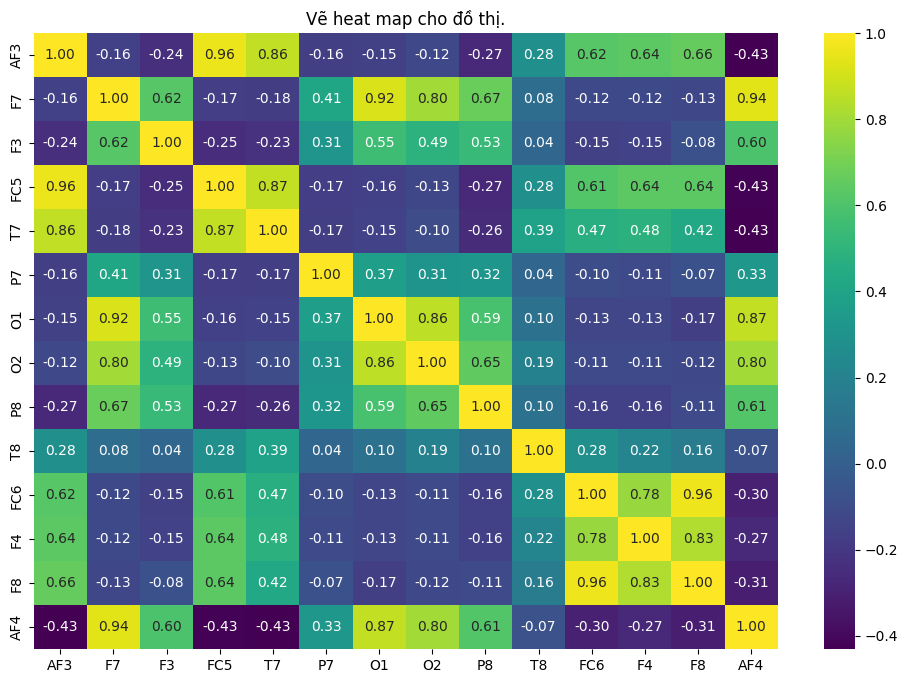

In [69]:
# đồ thị heatmap column_3_to_17_mat1 Biểu diễn mối liên hệ  tuyến tính giữa các kênh.

def plot_column_distributions(df):
  """Vẽ hear map.."""
  plt.figure(figsize=(12, 8))
  sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f")
  plt.title("Vẽ heat map cho đồ thị.")
  plt.show()

plot_column_distributions(column_3_to_17_mat1)

## 3. Vẽ biểu đồ đường EEG data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


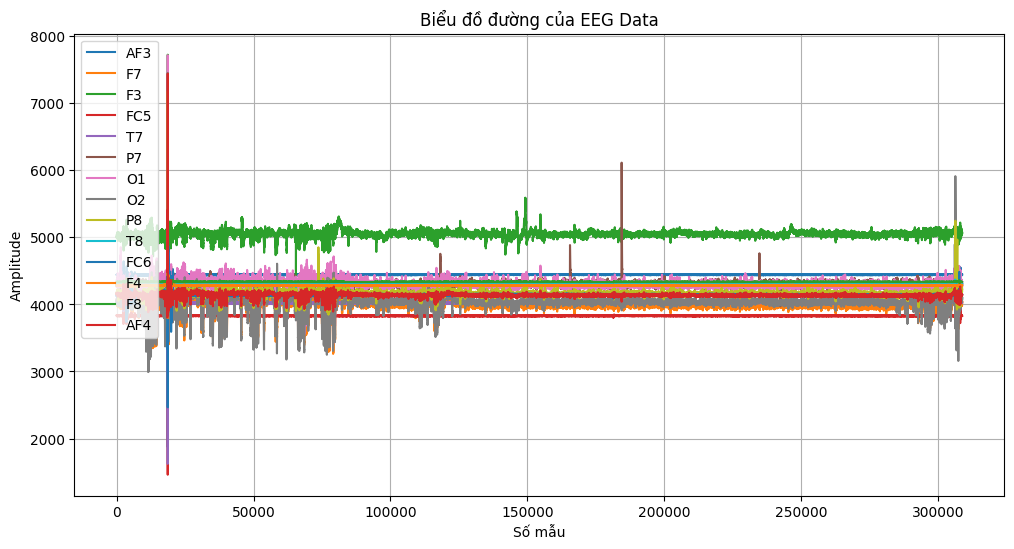

In [70]:
# vẽ biểu đồ đường.
def plot_line_chart(df):
  """Vẽ biểu đồ đường"""
  plt.figure(figsize=(12, 6))
  for column in df.columns:
    plt.plot(df[column], label=column)
  plt.xlabel("Số mẫu")
  plt.ylabel("Amplitude")
  plt.title("Biểu đồ đường của EEG Data")
  plt.legend()
  plt.grid(True)
  plt.show()

plot_line_chart(column_3_to_17_mat1)

## 4.Vẽ đồ thị phân phối

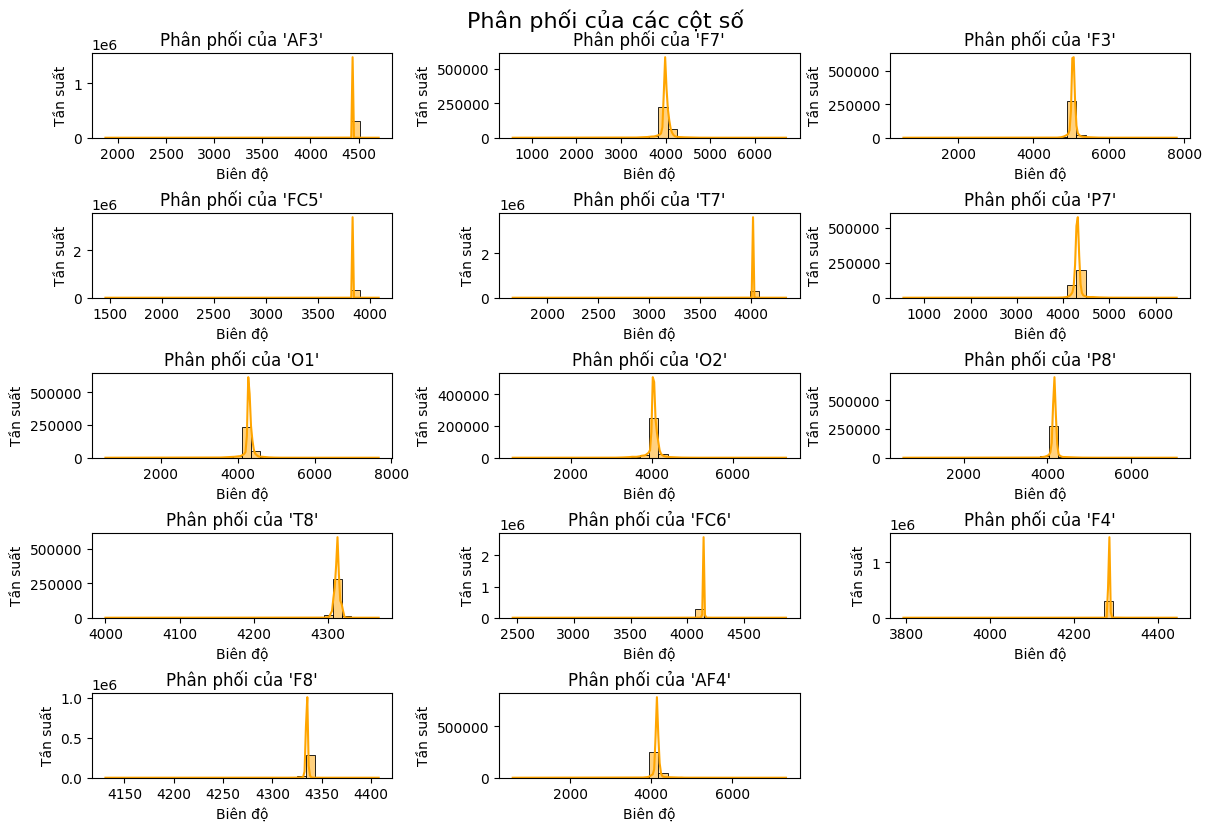

In [26]:
# vẽ các tầng số phân phối của dữ liệu. của dữ liệu của từng kênh..
plot_column_distributions(column_3_to_17_mat1)

## 5.Đồ thị power spectral density (PSD)

ower Spectral Density (PSD) là một cách để xem sức mạnh của âm thanh hoặc tín hiệu nằm ở các tần số khác nhau như thế nào. Hãy tưởng tượng như sau:

Khi bạn nghe nhạc, có những âm trầm (như tiếng trống) và âm cao (như tiếng sáo). PSD sẽ cho bạn biết âm nào mạnh hơn: tiếng trầm hay tiếng cao.

Nó giống như việc vẽ một biểu đồ để xem trong bài hát, phần nào to nhất (có nhiều năng lượng nhất), và phần nào nhỏ hơn.

Ví dụ: Nếu bạn hét lớn, biểu đồ sẽ cho thấy tần số của giọng nói bạn rất mạnh ở một số mức tần số nhất định.

In [39]:

# Tạo thông tin cho đối tượng Raw của MNE
info = mne.create_info(
    ch_names=[str(i) for i in column_3_to_17_mat1.columns],  # Danh sách tên các kênh
    ch_types=['eeg'] * len(column_3_to_17_mat1.columns),  # Kiểu tín hiệu cho tất cả các kênh là 'eeg'
    sfreq=128  # Tần suất lấy mẫu (sampling frequency)
)

# Tạo montage chuẩn cho các kênh EEG
montage = mne.channels.make_standard_montage('standard_1020')

# Áp dụng montage vào thông tin (info)
info.set_montage(montage)

# Khởi tạo đối tượng RawArray với dữ liệu từ DataFrame và thông tin
raw = mne.io.RawArray(column_3_to_17_mat1.values.T, info)


Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.


Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


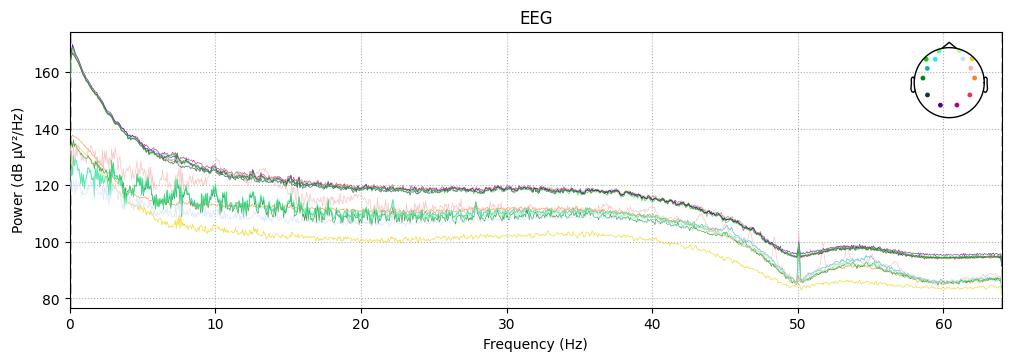

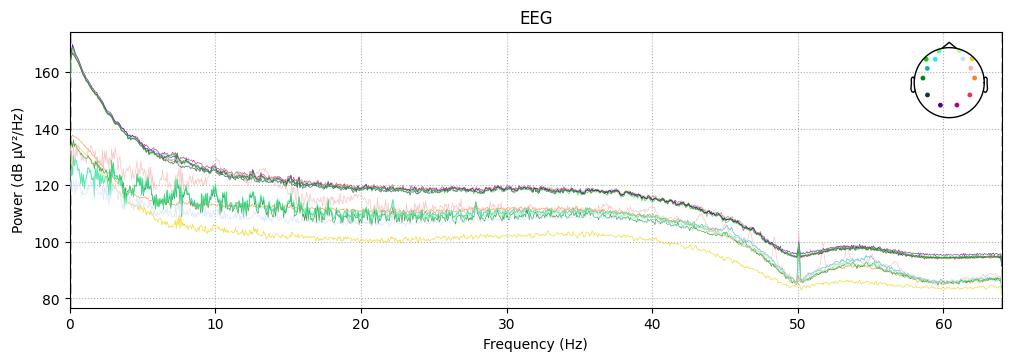

In [41]:
#Vẽ đồ thị spectro density.
raw.compute_psd(fmax=(matfile1.sampFreq/2)).plot(picks="data", exclude="bads", amplitude=False)


Nhận Xét Năng lượng có dãy công xuất mạnh nhất là ở khoảng từ 0 -> 10 HZ và có xu hướng giảm dần tại điểm có dãy là 50 thì xuất hiện một số đột biến nhỏ trong tập dữ liệu trên tại thời điểm power = 100 thì giá trị tập dữ liệu giảm đi còn 1/3
-Biểu đồ PSD cho thấy tín hiệu EEG chủ yếu tập trung ở dải tần số thấp (0–10 Hz), với hoạt động Alpha (8–13 Hz) nổi bật ở vùng chẩm (O1, O2). Điều này phù hợp với trạng thái thư giãn của người tham gia thí nghiệm. Tuy nhiên, nhiễu điện lưới xuất hiện ở 50–60 Hz cần được lọc bỏ để cải thiện chất lượng tín hiệu..

Trục Hoành (Frequency): Biểu thị tần số của sóng não, thường được chia thành các băng tần như Delta, Theta, Alpha, Beta và Gamma.
Trục Tung (Power): Thể hiện công suất của tín hiệu EEG tại từng tần số. Đơn vị dB µV/Hz cho biết mức năng lượng trong một băng tần cụ thể.
Đường Đồ Thị: Mỗi đường màu có thể đại diện cho các kênh EEG khác nhau hoặc các điều kiện khác nhau trong quá trình ghi nhận. Sự thay đổi của các đường này cho thấy sự khác biệt trong hoạt động điện não giữa các kênh hoặc điều kiện.
Biểu Đồ Phụ (Inset Plot): Hình tròn nhỏ ở góc phải có thể biểu thị vị trí của các kênh EEG trên đầu, giúp người xem hiểu rõ hơn về nguồn gốc của tín hiệu.

## 6.Vẽ đồ thị time-series plot.

Using matplotlib as 2D backend.


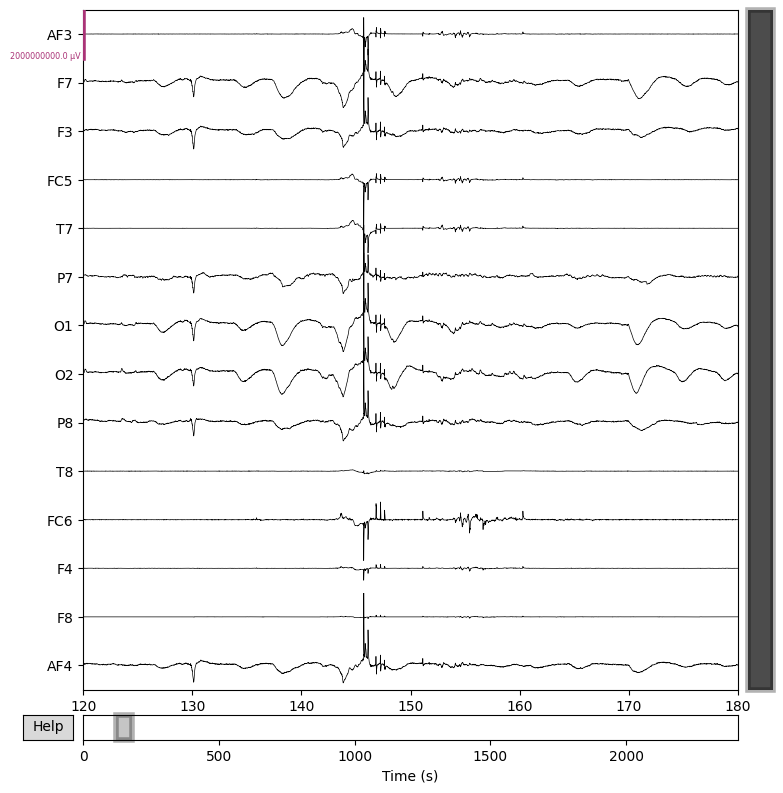

In [ ]:
scalings = {'eeg':1000} #  kiểm soát mức độ phóng đại của các tín hiệu khi hiển thị.
# vẽ các kênh cho file thứ 1.
raw.plot(start = 120, # bắt đầu tại giây thứ 120
         duration = 60, #kết thúc sau  60 giây
        scalings=scalings,
         title='scaled Data from arrays',
         show=True, block=True)
plt.show()

In [51]:
raw

<RawArray | 14 x 308868 (2413.0 s), ~33.0 MB, data loaded>

Tại giây thứ 140 ta thấy rằng có tồn tại một sự điện áp cao bất thường. Có sự thay đổi đột ngột và rõ ràng ở hầu hết các kênh (ví dụ: AF3, F7, F3, FC5, T7, v.v.). Điều này có thể phản ánh một sự kiện hoặc kích thích ngoại sinh hoặc nội sinh nào đó, chẳng hạn như một phản ứng thần kinh mạnh mẽ.
Các đỉnh nhọn có thể là biểu hiện của sự kích hoạt hoặc nhiễu (artifact) từ các chuyển động cơ hoặc môi trường bên ngoài.

## 7.Vẽ đồ thị Frequence Slice tập dữ liệu..

Effective window size : 1.000 (s)


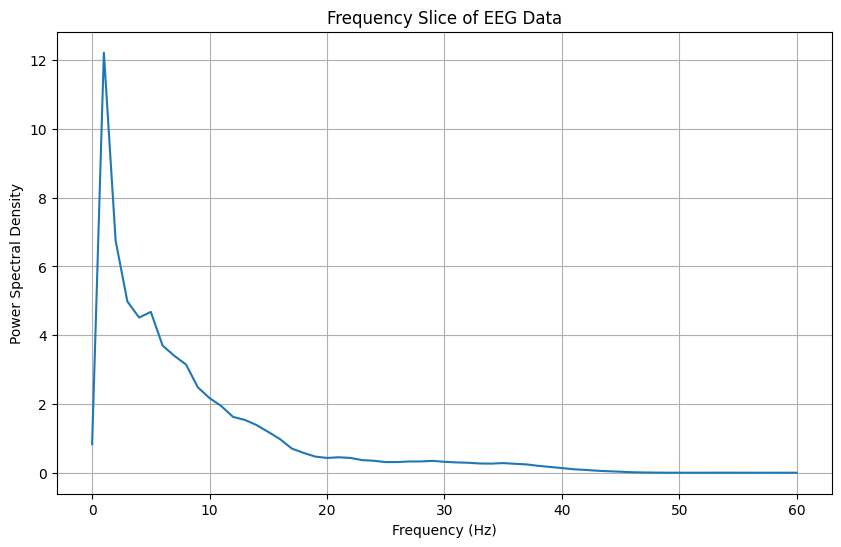

In [ ]:


# Compute PSD
psd = raw.compute_psd(fmin=0, fmax=60, n_fft=128) # vẽ dãy đồ thị trong thời gian từ 0 đến 60

# tạo data specture rum cho data.
psds, freqs = psd.get_data(return_freqs=True)

# Plot for the first channel
plt.figure(figsize=(10, 6))
plt.plot(freqs, psds[0]) # vẽ cho channel thứ 1
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Frequency Slice of EEG Data')
plt.grid(True)
plt.show()



#C.ICA dữ liệu.
Nguồn Kham Khảo: https://www.youtube.com/watch?v=kWAjhXr7pT4

## Giải thích về ICA
 là một kỹ thuật phân tích dữ liệu dùng để tách các tín hiệu độc lập từ một tập hợp các tín hiệu hỗn hợp. Mục đích của ICA là tìm ra các nguồn gốc tín hiệu độc lập, không liên quan đến nhau, từ một hoặc nhiều tín hiệu đã bị trộn lẫn.

Hãy tưởng tượng bạn đang ngồi trong một phòng và nghe 3 người nói cùng lúc. Nếu bạn chỉ có một microphone ghi âm, tất cả âm thanh từ 3 người sẽ trộn lẫn với nhau và bạn sẽ không thể nghe rõ từng người nói. ICA sẽ giúp bạn "tách" âm thanh của từng người ra từ tín hiệu hỗn hợp mà microphone ghi được, giống như việc bạn có thể nghe rõ ràng từng người nói dù chỉ có một microphone.

Ví dụ với EEG:

EEG (Electroencephalogram) là một phương pháp ghi lại hoạt động điện não. Các điện cực trên da đầu sẽ ghi nhận tín hiệu điện từ não, nhưng đôi khi tín hiệu này bị "trộn" với những tín hiệu khác, như tín hiệu cơ thể hoặc nhiễu từ môi trường xung quanh.

Giả sử bạn đang ghi nhận tín hiệu EEG của một người trong khi họ đang nghe nhạc. Tín hiệu EEG sẽ chứa các thông tin từ não của họ khi họ nghe nhạc, nhưng cũng có thể có thêm tín hiệu nhiễu từ các cơ bắp (như nhịp đập của tim hoặc các chuyển động cơ thể).

Nếu dùng ICA, nó sẽ giúp "tách" các tín hiệu này ra. Ví dụ, ICA có thể tách riêng tín hiệu từ não (hoạt động não khi nghe nhạc) và tín hiệu từ các cơ bắp (như tiếng chuyển động hoặc đập tim). Điều này rất hữu ích để phân tích và hiểu rõ hơn về các hoạt động của não mà không bị nhiễu.
## Mô hình toán học của ICA

Giả sử ta có \( X \) là một ma trận tín hiệu quan sát với \( n \) tín hiệu quan sát và \( m \) mẫu:

$$
X = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
$$

Ma trận \( X \) có thể được biểu diễn dưới dạng:

$$
X = A S
$$

Trong đó:

- \( A \) là ma trận trộn với kích thước \( n \times m \), thể hiện cách các tín hiệu nguyên thủy (các thành phần độc lập) được trộn lại thành các tín hiệu quan sát.
- \( S \) là ma trận thành phần độc lập với kích thước \( m \times n \), trong đó mỗi cột của ma trận \( S \) là một thành phần độc lập mà ta muốn khôi phục.

Mục tiêu của ICA là tìm ma trận \( S \) và \( A \) sao cho:

$$
S = A^{-1} X
$$

Các thành phần trong \( S \) là các thành phần độc lập, và quá trình này yêu cầu các giả định về độc lập thống kê giữa các thành phần trong \( S \).

## Ý nghĩa của ICA

### Khôi phục các thành phần nguyên thủy (Source Separation)

ICA rất hữu ích trong việc tách các tín hiệu hỗn hợp mà không biết trước về các thành phần nguồn (source components). Một trong những ứng dụng phổ biến của ICA là tách âm thanh trong các tình huống mà các tín hiệu âm thanh từ nhiều nguồn khác nhau bị trộn lẫn. Ví dụ, trong bài toán "cocktail party", nhiều người nói chuyện cùng lúc, và ICA có thể giúp tách các giọng nói riêng biệt từ tín hiệu ghi âm hỗn hợp.

### Phân tích tín hiệu trong nghiên cứu não bộ (EEG, fMRI)

ICA được sử dụng rộng rãi trong phân tích tín hiệu não, đặc biệt là trong các tín hiệu EEG (electroencephalogram) hoặc fMRI (functional Magnetic Resonance Imaging). Khi ghi lại tín hiệu từ não, nhiều nguồn tín hiệu có thể chồng lên nhau (chẳng hạn, tín hiệu não, nhịp tim, chuyển động mắt, v.v.). ICA giúp phân tách các thành phần độc lập, giúp xác định các nguồn hoạt động não riêng biệt.

### Phân tích ảnh

Trong phân tích ảnh, ICA có thể được sử dụng để tách các thành phần độc lập từ các ảnh, đặc biệt khi các ảnh đó được trộn lẫn với nhau. Điều này có thể ứng dụng trong việc phân tích và nén ảnh, hoặc trong việc xác định các đặc trưng riêng biệt trong một tập hợp ảnh.

### Xử lý tín hiệu và âm thanh

ICA cũng có thể được áp dụng trong xử lý âm thanh, chẳng hạn như tách các tín hiệu âm thanh khác nhau trong một bản ghi âm hỗn hợp. Trong môi trường âm nhạc hoặc ghi âm, các nguồn tín hiệu (nhạc cụ, giọng hát) có thể bị trộn lẫn, và ICA có thể giúp tách chúng để phục hồi các tín hiệu ban đầu.

### Ứng dụng trong phân tích dữ liệu lớn (Big Data)

ICA có thể giúp phân tách các đặc trưng quan trọng từ dữ liệu lớn, giúp trong việc phân loại, khám phá mẫu hoặc nén dữ liệu. Ví dụ, trong phân tích dữ liệu tài chính, ICA có thể giúp tách biệt các yếu tố độc lập ảnh hưởng đến thị trường tài chính.

### Tự động học và trí tuệ nhân tạo

ICA có thể đóng vai trò quan trọng trong việc phân tích dữ liệu trong các hệ thống học máy, đặc biệt khi các dữ liệu quan sát có thể là sự kết hợp của các thành phần độc lập không dễ dàng nhận diện. Nó có thể giúp cải thiện hiệu suất của các mô hình học sâu trong các bài toán phân loại hoặc nhận dạng mẫu.

## Lợi ích và Thách thức của ICA

### Lợi ích

- **Tách các tín hiệu độc lập:** ICA giúp phân tách các tín hiệu độc lập từ các tín hiệu quan sát được, điều này rất quan trọng trong các ứng dụng phân tích tín hiệu và xử lý âm thanh.
- **Ứng dụng rộng rãi:** ICA có thể được áp dụng trong nhiều lĩnh vực khác nhau, từ xử lý tín hiệu đến nghiên cứu não bộ, từ phân tích hình ảnh đến phân tích dữ liệu tài chính.
- **Không yêu cầu kiến thức trước:** Một điểm mạnh của ICA là không cần biết trước về số lượng các thành phần độc lập, chỉ cần các tín hiệu quan sát và giả định rằng các thành phần là độc lập.

### Thách thức

- **Yêu cầu dữ liệu có tính độc lập cao:** ICA hoạt động hiệu quả nhất khi các thành phần trong dữ liệu thực sự độc lập thống kê. Trong thực tế, điều này có thể không luôn luôn xảy ra.
- **Khó khăn trong việc xác định số lượng thành phần độc lập:** Mặc dù ICA không yêu cầu xác định số lượng thành phần trước, nhưng đôi khi việc xác định số lượng các thành phần độc lập là một thách thức trong các ứng dụng thực tế.
- **Tính toán phức tạp:** Các thuật toán ICA, đặc biệt là trong các ứng dụng phức tạp, có thể đòi hỏi tính toán cao và có thể yêu cầu nhiều bộ nhớ và tài nguyên tính toán.

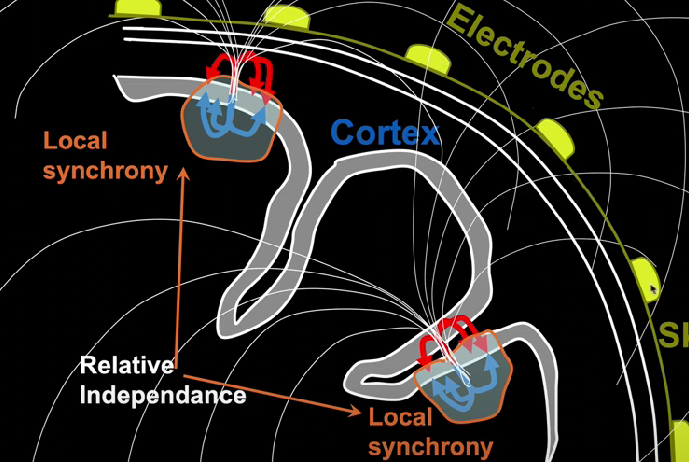

Sử dụng ICA để phân tách chọn ra sóng  sóng của các local synchrony

Fitting ICA to data using 14 channels (please be patient, this may take a while)


<ipython-input-47-d02cfe745e75>:6: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 13.0s.


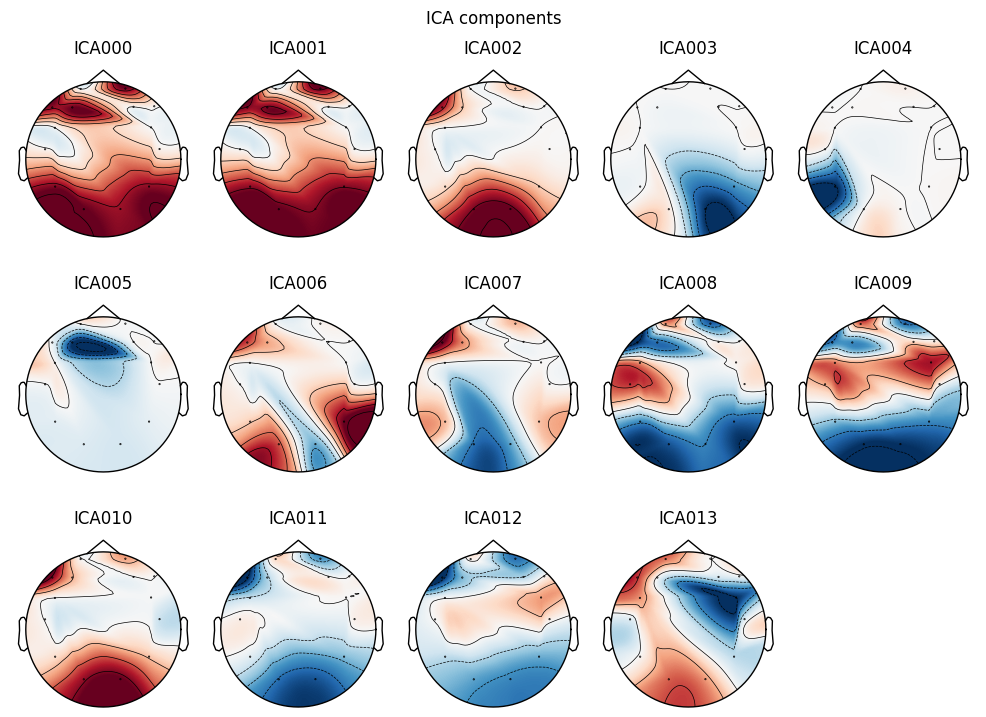

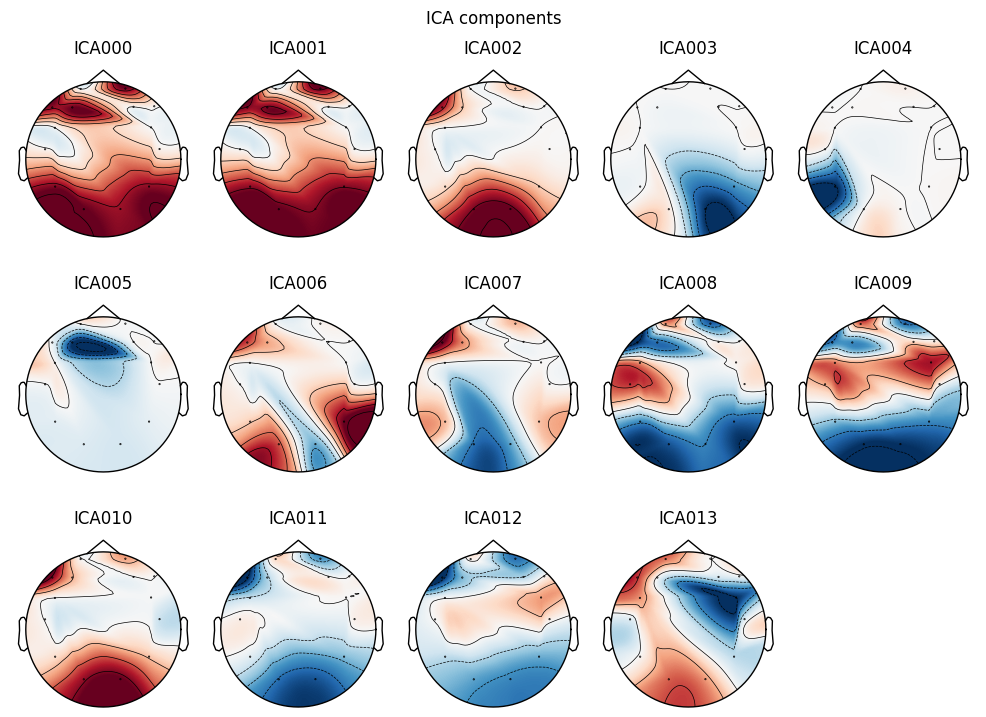

In [47]:
import mne
from mne.preprocessing import ICA


# Khởi tạo ICA với các tham số cần thiết vẽ tối đa được 14 tham số
ica = ICA(n_components=14, random_state=97, max_iter=800)
ica.fit(raw)

# Xem các thành phần ICA đã tách
ica.plot_components()


Mỗi thành phần ICA: Mỗi hình trong hình ảnh đại diện cho một thành phần được tách ra từ tín hiệu EEG bằng phương pháp ICA. Các thành phần này có thể là các nguồn gốc tín hiệu độc lập, ví dụ như tín hiệu từ não, tín hiệu cơ thể, hoặc nhiễu.

Màu sắc: Màu sắc trên bản đồ không gian cho thấy cường độ của tín hiệu ở các vị trí khác nhau trên đầu. Màu đỏ và màu xanh tương phản thể hiện các giá trị cực đại và cực tiểu của tín hiệu tại các vị trí khác nhau.

Màu đỏ: Cường độ tín hiệu dương (tín hiệu mạnh ở những vùng này).
Màu xanh: Cường độ tín hiệu âm (tín hiệu yếu hoặc không có tín hiệu ở các khu vực này).
Các đường viền (contours) cũng thể hiện sự phân bố của tín hiệu trên các khu vực khác nhau.
Vị trí kênh EEG: Mỗi hình ảnh thể hiện sự phân bố tín hiệu của thành phần ICA tại các vị trí trên đầu, như thể hiện trong hệ thống điện cực EEG chuẩn (ví dụ: 10-20 system).

Số thành phần ICA: Các thành phần ICA được đánh số từ ICA000 đến ICA013, mỗi thành phần có thể tương ứng với một nguồn tín hiệu độc lập được tách ra từ các tín hiệu hỗn hợp ban đầu.

chọn useful_channels là như trên vì F7 và F3: Thường liên quan đến các vùng trán trước (frontal), có thể hữu ích trong nghiên cứu về các tình trạng nhận thức hoặc hoạt động thần kinh trong quá trình ra quyết định, tập trung, hay các trạng thái tâm lý khác.
P7, P8: Liên quan đến vùng chẩm (parietal) và có thể ghi lại tín hiệu liên quan đến quá trình nhận thức và hành động.
O1, O2: Liên quan đến vùng chẩm (occipital), có thể ghi lại hoạt động liên quan đến thị giác hoặc trạng thái nghỉ ngơi.
AF4: Vị trí gần vùng trán (frontal) phía trước, có thể hữu ích trong việc phát hiện các thay đổi trong hoạt động não.

## 1.vẽ EOG epoch.


Dữ liệu EOG (Electrooculography) được sử dụng để ghi lại chuyển động mắt bằng cách đo sự thay đổi điện thế giữa vùng trước (gần mắt) và vùng sau (xương sọ). Trong nghiên cứu EEG (Electroencephalography), dữ liệu EOG thường được sử dụng với các mục đích chính như sau:

1. Phát hiện và loại bỏ nhiễu từ chuyển động mắt trong tín hiệu EEG
Khi thực hiện ghi tín hiệu EEG, chuyển động mắt hoặc nháy mắt có thể tạo ra nhiễu (artifacts) trong dữ liệu EEG, thường được gọi là EOG artifacts. Dữ liệu EOG giúp:

Xác định nhiễu: Các chuyển động mắt hoặc nháy mắt tạo ra dao động lớn trong tín hiệu EEG, dễ dàng được phát hiện từ kênh EOG.
Loại bỏ nhiễu: Kết hợp dữ liệu EOG với các phương pháp xử lý như Independent Component Analysis (ICA) hoặc Regression, bạn có thể loại bỏ ảnh hưởng của các chuyển động mắt khỏi tín hiệu EEG thực.
Ví dụ: Khi nghiên cứu hoạt động não bộ liên quan đến một nhiệm vụ cụ thể, nếu không loại bỏ nhiễu EOG, tín hiệu từ chuyển động mắt có thể làm sai lệch kết quả phân tích.

2. Phân tích chuyển động mắt trong nghiên cứu thần kinh
Dữ liệu EOG cũng được sử dụng để trực tiếp phân tích chuyển động mắt, giúp hiểu rõ hơn về:

Sự chú ý và theo dõi thị giác: Dữ liệu EOG có thể được dùng để xác định hướng nhìn của mắt hoặc các mẫu chuyển động mắt (như saccades, fixations).
Hoạt động liên quan đến giấc ngủ: Trong nghiên cứu giấc ngủ (polysomnography), chuyển động mắt (được đo bằng EOG) là một yếu tố chính để phân loại các giai đoạn của giấc ngủ, đặc biệt là giấc ngủ REM (Rapid Eye Movement).
Các rối loạn thần kinh: EOG có thể hỗ trợ nghiên cứu các bệnh như Parkinson, ADHD, hoặc các rối loạn liên quan đến chuyển động mắt.

In [53]:
# Liệt kê các kênh có trong dữ liệu
print(raw.info['ch_names'])


['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


In [58]:
# Tìm các thành phần ICA liên quan đến EOG
# Khai báo rõ ràng kênh EOG
eog_epochs = mne.preprocessing.create_eog_epochs(raw, ch_name='T7')  # Sử dụng tên kênh 'T7' làm kênh EOG
eog_inds, scores = ica.find_bads_eog(raw, ch_name='T7')  # Xác định các thành phần liên quan đến EOG từ kênh 'T7'

# In ra các chỉ số thành phần ICA được phát hiện
print(f"EOG-related components: {eog_inds}")

# Đánh dấu các thành phần này để loại trừ
ica.exclude = eog_inds

Using EOG channel: T7
EOG channel index for this subject is: [4]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel T7 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 3 significant peaks
Number of EOG events detected: 3
Not setting metadata
3 matching events found
No baseline correction applied
Using data from preloaded Raw for 3 events and 129 original time points ...
0 bad epochs dropped
Using EOG channel: T7
... filtering ICA 

Using EOG channel: T7
EOG channel index for this subject is: [4]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel T7 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 3 significant peaks
Number of EOG events detected: 3
Not setting metadata
3 matching events found
No baseline correction applied
Using data from preloaded Raw for 3 events and 129 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean

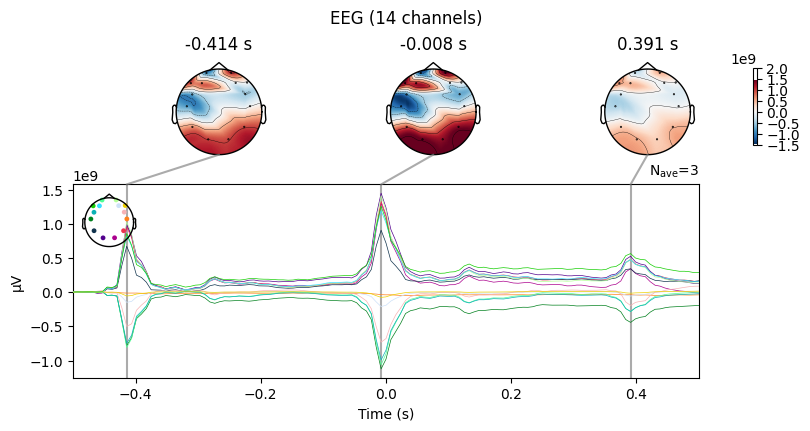

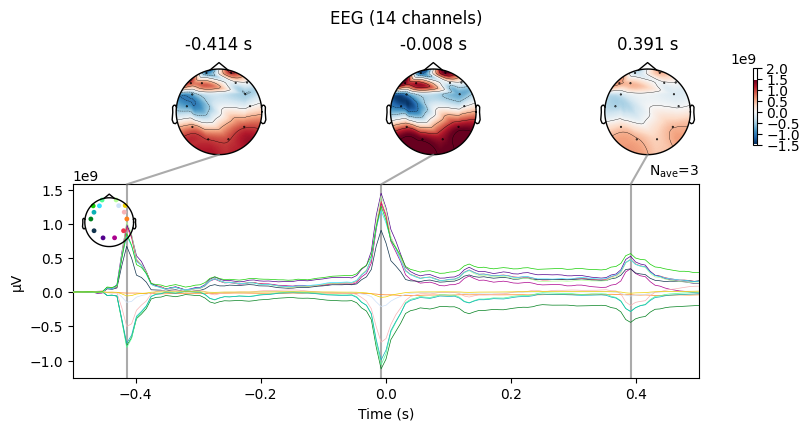

In [67]:
# Tạo các epoch EOG trung bình từ kênh T7
eog_draw = create_eog_epochs(raw, ch_name='T7').average()

# Áp dụng baseline correction từ thời điểm bắt đầu đến -0.5 giây
eog_draw.apply_baseline(baseline=(None, -0.5))

# Vẽ đồ thị với các kênh tham gia
eog_draw.plot_joint()

Đoạn sóng EEG:

Phần dưới của hình ảnh là tín hiệu EEG được ghi lại từ 14 kênh EEG khác nhau. Trục hoành là thời gian (tính bằng giây), và trục tung là điện áp (tính bằng microvolts, µV). Các đường cong đại diện cho hoạt động điện não theo thời gian. Các đỉnh và đáy trong sóng EEG có thể phản ánh các phản ứng của não đối với một kích thích hoặc sự kiện.
Bản đồ topo:

Ở trên, bạn có ba bản đồ topo mô tả sự phân bố điện thế trên da đầu tại các thời điểm khác nhau:
-0.414 s: Phân bố điện thế trên da đầu tại thời điểm 0.414 giây trước sự kiện trung tâm.
-0.008 s: Phân bố điện thế trên da đầu ngay trước sự kiện trung tâm (0.008 giây trước).
0.391 s: Phân bố điện thế trên da đầu sau sự kiện trung tâm (0.391 giây sau).
Thông số Nave:

Phía bên phải của hình ảnh có giá trị Nave=3, cho thấy số lần trung bình mà dữ liệu EEG đã được làm trơn hoặc trung bình qua một số lần ghi khác nhau.
Thang màu:

Bản đồ topo sử dụng thang màu để thể hiện độ mạnh yếu của tín hiệu điện não tại các khu vực khác nhau của da đầu. Màu sắc từ đỏ đến xanh lá cây và xanh dương thể hiện các mức độ khác nhau của điện thế.